In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
ResultsDir = "../Results/logs"
trajs = os.listdir(ResultsDir)
runs = os.listdir(f"{ResultsDir}/{trajs[0]}")
dataPath = f"{ResultsDir}/{trajs[0]}/{runs[0]}/data.npz"
data = np.load(dataPath)

In [8]:
# view the data keys of npz file
print(data.files)
xs = data["xs"]
print(xs.shape)
xPos = xs[:, :6]
xVel = xs[:, 6:12]
xAcc = xs[:, 12:18]

['sim_timestep', 'duration', 'ctrl_timestep', 'object_names', 'nq', 'nv', 'nx', 'nu', 'ts', 'us', 'xs', 'xds', 'uds', 'r_ew_ws', 'Q_wes', 'v_ew_ws', 'ω_ew_ws', 'cmd_vels', 'r_ow_ws', 'Q_wos', 'r_ew_w_ds', 'Q_we_ds', 'solve_times', 'cost', 'contact_forces', 'object_dynamics_constraints']
(3001, 18)


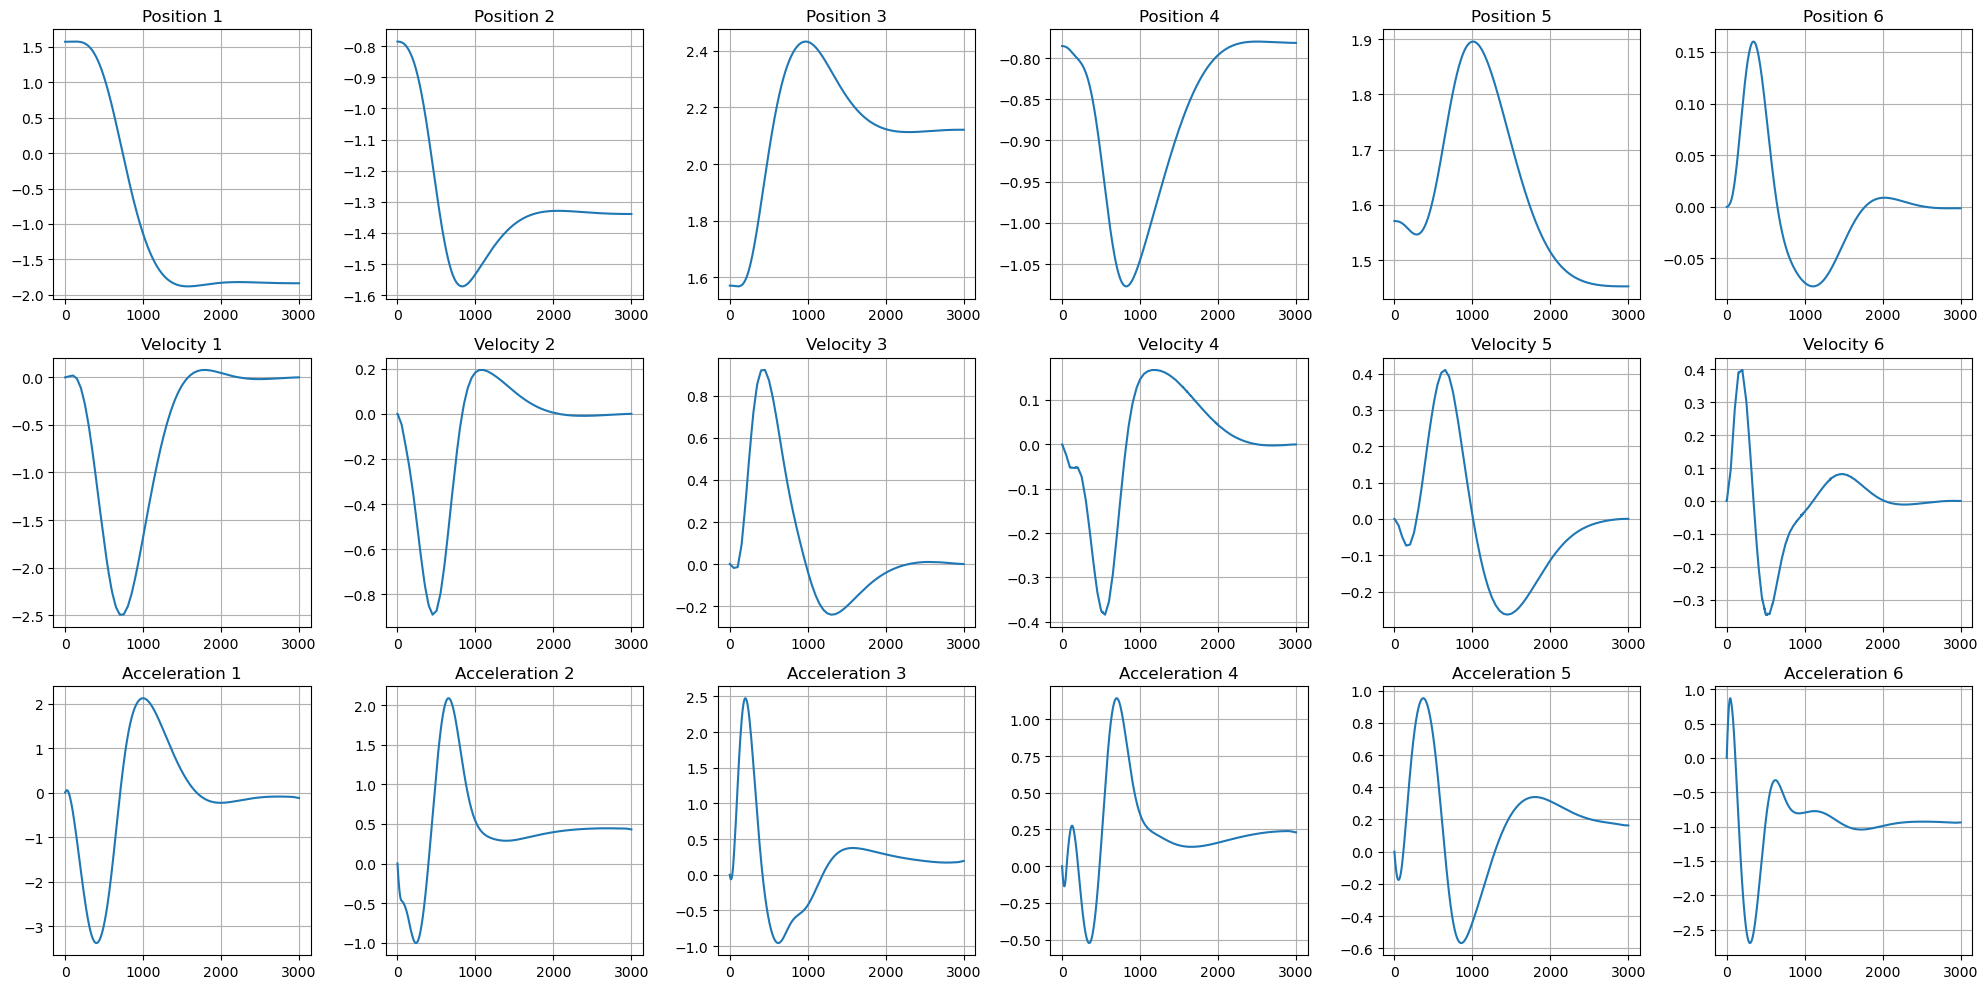

In [9]:
# Create a 3x6 grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 10))

# Plot position data
for i in range(6):
    axes[0,i].plot(xPos[:,i])
    axes[0,i].set_title(f'Position {i+1}')
    axes[0,i].grid(True)

# Plot velocity data
for i in range(6):
    axes[1,i].plot(xVel[:,i])
    axes[1,i].set_title(f'Velocity {i+1}')
    axes[1,i].grid(True)

# Plot acceleration data
for i in range(6):
    axes[2,i].plot(xAcc[:,i])
    axes[2,i].set_title(f'Acceleration {i+1}')
    axes[2,i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [13]:
# save position data as npy
np.save("../Results/logsPos/xPos.npy", xPos)


In [11]:
tgt_radius = np.array([0.6, 0.7, 0.8, 0.9, 1.0]) # N=5
tgt_pitch = np.array([-np.pi/6, 0,  np.pi/6, np.pi/3]) # M=4
tgt_yaw = np.array([np.pi/2]) # L=3

start_yaw = np.array([np.pi/2]) # K=3


# Create meshgrid of spherical coordinates
R, P, Y = np.meshgrid(tgt_radius, tgt_pitch, tgt_yaw)

# Convert spherical to Cartesian coordinates
X = R * np.cos(P) * np.cos(Y)
Y = R * np.cos(P) * np.sin(Y)
Z = R * np.sin(P)

# Reshape into Nx3 array of xyz coordinates
goal_positions = np.column_stack((
    X.flatten(),
    Y.flatten(),
    Z.flatten()
))

# Round to 3 decimal places
goal_positions_ccw = np.round(goal_positions, decimals=5)
goal_positions_cw = -np.round(goal_positions, decimals=5)

# Generate random indices for shuffling while maintaining pairs
n_positions = len(goal_positions_ccw)
shuffle_indices1 = np.random.permutation(n_positions)
shuffle_indices2 = np.random.permutation(n_positions)

# Create interleaved positions array and shuffle using the indices
interleaved_positions = np.empty((goal_positions_ccw.shape[0] + goal_positions_cw.shape[0], 3))
interleaved_positions[0::2] = goal_positions_ccw[shuffle_indices1]
interleaved_positions[1::2] = goal_positions_cw[shuffle_indices2]
print(f"Shape of interleaved positions: {interleaved_positions.shape}")
print(f"Interleaved positions: {interleaved_positions}")

# Save the interleaved positions to a file


Shape of interleaved positions: (40, 3)
Interleaved positions: [[ 0.       0.77942 -0.45   ]
 [-0.      -0.5     -0.86603]
 [ 0.       0.51962  0.3    ]
 [-0.      -0.77942  0.45   ]
 [ 0.       0.69282  0.4    ]
 [-0.      -0.60622  0.35   ]
 [ 0.       1.       0.     ]
 [-0.      -0.6     -0.     ]
 [ 0.       0.86603 -0.5    ]
 [-0.      -0.7     -0.     ]
 [ 0.       0.69282 -0.4    ]
 [-0.      -0.51962 -0.3    ]
 [ 0.       0.60622 -0.35   ]
 [-0.      -1.      -0.     ]
 [ 0.       0.77942  0.45   ]
 [-0.      -0.69282 -0.4    ]
 [ 0.       0.7      0.     ]
 [-0.      -0.3     -0.51962]
 [ 0.       0.35     0.60622]
 [-0.      -0.45    -0.77942]
 [ 0.       0.45     0.77942]
 [-0.      -0.86603  0.5    ]
 [ 0.       0.4      0.69282]
 [-0.      -0.8     -0.     ]
 [ 0.       0.51962 -0.3    ]
 [-0.      -0.35    -0.60622]
 [ 0.       0.60622  0.35   ]
 [-0.      -0.86603 -0.5    ]
 [ 0.       0.9      0.     ]
 [-0.      -0.77942 -0.45   ]
 [ 0.       0.6      0.     ]
 [-0.  